<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/ML_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tarea 1. Aprendizaje máquina.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

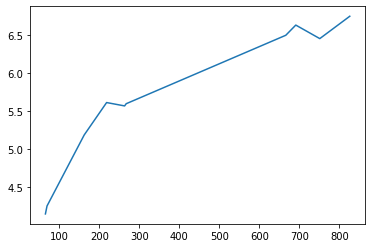

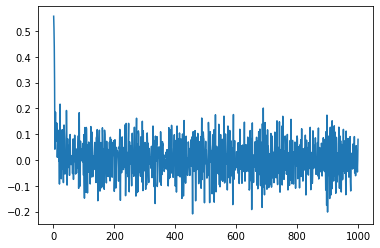

In [19]:
def GD_N(theta,alpha,eta,nIter, grad,stop_crit=10**(-4)):#GD Nesterov.
    p     = np.zeros(theta.shape)
    Theta=[theta]
    for t in range(nIter):
        pre_theta = theta - 2.0*alpha*p
        g = grad(pre_theta)
        p = 0.5*(g + eta*p)
        if(np.linalg.norm(g)<stop_crit):
            if(t==0):
                print("No hizo nada\n")
            break
        theta = theta - alpha*p
        Theta.append(theta)
    print("Iteraciones: ",t)
    return Theta[-1]
#Datos-----------------
np.random.seed(0)
n=1000
x=np.linspace(1,n,n)
y=np.log(x)+np.random.normal(0,.1,size=len(x))
from numpy.random import default_rng
m=10
x_m=np.sort(default_rng().choice(np.arange(0, len(x)), size=m, replace=False))
y_m=y[x_m]
#plt.plot(x,y)
plt.plot(x_m,y_m)
plt.show()
#Diferencias finitas.
y_p=np.zeros(n)
y_p[0]=y[1]-y[0]
y_p[-1]=y[-1]-y[-2]
y_p[1:-2]=(y[2:-1]-y[0:-3])/2
plt.plot(x,y_p)
plt.show()
#Le vamos a ajustar a los datos y_p.
#-----------------------------


In [20]:
def matriz_phi_sigma(sigma):#Matriz Phi
    M=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            M[i,j] = np.exp(-((x[i] -x_m[j])**2)/(2*(sigma[j])**2))*(-(x[i] -x_m[j]))/(sigma[j]**2)
    return M
def solve_for_alphas(M):#Resolver para alphas.
    return np.dot(np.dot(np.linalg.inv(np.dot(M.T,M)),M.T),y)
#solve_for_alphas(matriz_phi_sigma(np.repeat(1,m)))

array([-0.12578445, -0.10341621, -0.13282028, -0.18032091, -0.02516534,
       -0.05741671, -0.05440285,  0.13996311,  0.05777092, -0.16630067])

In [22]:
def phi(s,x,x_j):#Funciones reales. phi_{i,j}"
    return np.exp(-((x -x_j)**2)/(2*(s)**2))*(-(x -x_j))/(s**2)
def J_sigma_phi(sigma,alpha):#Jacobiana de la transformacion Phi*alpha como funcion de sigma.
    J=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            J[i][j]=alpha[j]*((phi(s=sigma[j],x=x[i],x_j=x_m[j]))*((x[i]-x_m[j])**2/sigma[j]**3)*(-(x[i]-x_m[j])/sigma[j]**2)+phi(s=sigma[j],x=x[i],x_j=x_m[j])*(2*(x[i]-x_m[j])/sigma[j]**3))
    return J
J_sigma_phi(sigma=np.repeat(1,100),alpha=np.repeat(1,100))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])